In [1]:
import pandas as pd
import numpy as np
import regex as re
import pylab as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plot
import src

In [2]:
#pd.set_option('display.max_rows', None)

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../data/attacks.csv', low_memory=False, encoding= "ISO-8859-1")
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
data.shape

(25723, 24)

<AxesSubplot: >

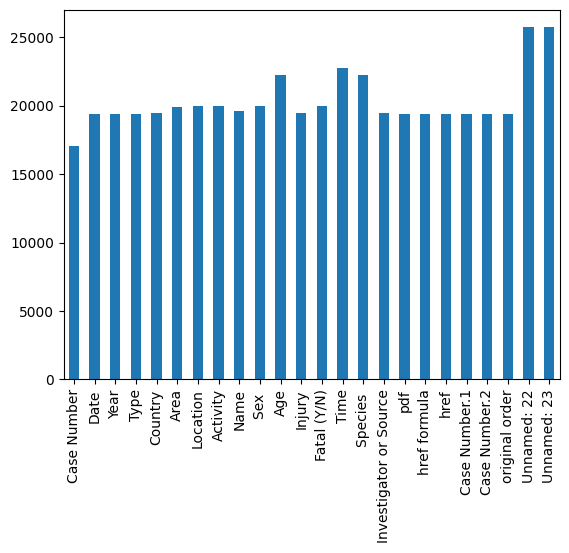

In [7]:
data.isnull().sum().plot.bar()

In [8]:
#Revisamos los tipos de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Borro nulos

In [9]:
# Elimino filas con valores nulos puesto que no se pueden eliminar columnas
data.dropna(how = "all", inplace = True)

In [10]:
data.shape

(8703, 24)

In [11]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Elimino duplicados

In [12]:
# Con drop_duplicates eliminamos duplicados

In [13]:
data=data.drop_duplicates()

data.drop_duplicates(inplace=True)

In [14]:
data.shape

(6311, 24)

In [15]:
data.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Compruebo que no existen más duplicados

data.duplicated().any()

False

In [17]:
data.shape

(6311, 24)

In [18]:
#Elimino filas por número de índice, en las cuales más del 90% son valores nulos, pero no en su totalidad

<AxesSubplot: >

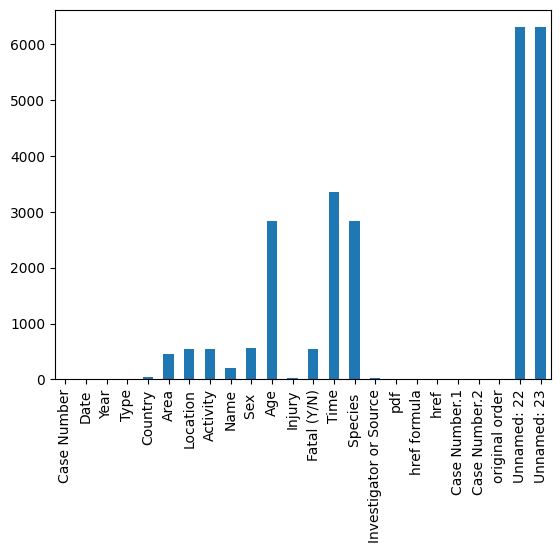

In [20]:
data.isnull().sum().plot.bar()

In [21]:
# NO tiene sentido que sigamos manteniendo las columnas con valores nulos (a pesar de las restricciones)

In [22]:
# Volvemos a explorar columnas que contengan nulos

In [24]:
# Las columnas que más nulos contienen son: Age, Time y Species

### Cambiar 'null' por 'Unknown'

In [25]:
data["Type"] = data["Type"].fillna('Unknown')

In [26]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6302 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

Case Number                  1
Date                         0
Year                         2
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [27]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6302 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

Case Number                  1
Date                         0
Year                         2
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [28]:
data.shape

(6302, 24)

In [29]:
# Aquí me doy cuenta de que sustituir valores nulos por 'Unknowns' NO SIRVE PARA NADA!!

In [30]:
# Aquí es cuando empiezo a formular una "teoría/hipótesis" que es, centrarme en un ÚNICO país (tengo datos de demasiados países)

In [31]:
data['Country'].value_counts()

USA                       2229
AUSTRALIA                 1338
SOUTH AFRICA               579
PAPUA NEW GUINEA           134
NEW ZEALAND                128
                          ... 
MALDIVE ISLANDS              1
NICARAGUA                    1
NORTH SEA                    1
RED SEA / INDIAN OCEAN       1
CEYLON (SRI LANKA)           1
Name: Country, Length: 212, dtype: int64

In [32]:
df_usa = data[data['Country'] == 'USA']

In [33]:
df_usa.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4958,1933.08.26.R,Reported 26-Aug-1933,1933.0,Unprovoked,USA,Connecticut,Mystic River,Swimming,Helen Clarke,F,NaN,Foot bitten,N,NaN,NaN,"Hartford Courant, 8/26/1933",1933.08.26.R-HelenClarke.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1933.08.26.R,1933.08.26.R,1345.0,NaN,NaN
1097,2009.08.25,25-Aug-2009,2009.0,Unprovoked,USA,California,"Terramar Beach, Carlsbad, San Diego County",Swimming,Bethany Edmund,F,22,Puncture wounds to left foot & calf,N,16h30,"White shark, 5' to 6' juvenile","R. Collier, GSAF",2009.08.25-Edmund.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.08.25,2009.08.25,5206.0,NaN,NaN
4274,1955.12.11,11-Dec-1955,1955.0,Boating,USA,Florida,½ mile offshore & 9 miles north of Fort Pierce,Fishing for pompano,"boat, occupants: P.D. Neilly & Charlton Anderson",NaN,NaN,"No injury to occupants, shark released from ne...",N,NaN,NaN,"R.F. Hutton, 3/30/1959, citing Miami Herald; T...",1955.12.11-boat Neilly_Charlton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.12.11,1955.12.11,2029.0,NaN,NaN
2539,1992.08.21,21-Aug-1992,1992.0,Invalid,USA,Hawaii,"Twin Arches, Hana Ranch, Maui",Fell from cliff while fishing & disappeared in...,Chester N. Shishido,M,NaN,Body recovered next morning. Injuries appeared...,NaN,15h00,Questionable incident,"J. Borg, p.82; L. Taylor (1993), pp.114-115",1992.08.21-Shishido.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1992.08.21,1992.08.21,3764.0,NaN,NaN
1820,2002.10.03,03-Oct-2002,2002.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Cheyne Kehoe,M,18,Left hand lacerated and abraded,N,14h35,3.5' to 4' shark,"S. Petersohn, GSAF; Local 6 News; Orlando Sent...",2002.10.03-Kehoe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2002.10.03,2002.10.03,4483.0,NaN,NaN


In [34]:
#data["Country"].value_counts().plot.bar()

In [35]:
# Con regex es posible tomar todos los valores que sean exclusivamente numéricos y el resto pasarlos a NaN
# Puedes reemplazar NaN por la media

In [36]:
df_usa.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [37]:
#Creo nueva variable df_cleaning y empiezo a verlo más claro

In [38]:
# Para varias columnas, doble corchete
#df_cleaning = df_usa[['Date', 'Year', 'Type', 'Country', 'Area',
#       'Activity', 'Sex ', 'Age', 'Fatal (Y/N)']].reset_index(drop=True)

In [83]:
df_cleaning = df_usa

In [85]:
#Con este gráfico empiezo a darme cuenta que los hombres son más atacados que las mujeres

In [86]:
df_cleaning.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [87]:
df_cleaning.isnull().sum().sort_values()

Date                         0
Year                         0
Type                         0
Country                      0
original order               0
Case Number.2                0
Case Number.1                0
href                         0
href formula                 0
pdf                          0
Case Number                  1
Area                         4
Injury                       5
Investigator or Source       7
Name                        30
Location                    51
Sex                         98
Activity                   134
Fatal (Y/N)                188
Age                        727
Time                       845
Species                    906
Unnamed: 22               2228
Unnamed: 23               2228
dtype: int64

### Convertir a numéricos

In [88]:
#Seguimos limpiando convirtiendo columnas con datos numéricos a su formato adecuado 

In [89]:
#Por ejemplo: La columna 'Year' a int.

In [151]:
df_cleaning.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23,dias,mes,date_sum,date_formated
5314,1916.06.23,23-Jun-1916,1916,Provoked,USA,Florida,NaN,NaN,Adolph Crouse,M,26,Leg bitten by shark hooked shark PROVOKED INCI...,N,NaN,NaN,"New York Times, 6/29/1916",1916.06.23-Crouse.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.06.23,1916.06.23,989.0,NaN,NaN,23,Jun,23-Jun-1916,1916-06-23
312,2016.01.28,28-Jan-2016,2016,Unprovoked,USA,Hawaii,"Hanalei Bay, Kauai",Surfing,male,M,-1,Lacerations to both hands,N,14h00,"Reef shark, 5'",KHON2. 1/28/2016,2016.01.28-Kauai.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.01.28,2016.01.28,5991.0,NaN,NaN,28,Jan,28-Jan-2016,2016-01-28
1281,2008.03.28.b,28-Mar-2008,2008,Unprovoked,USA,Florida,"New Smyrna Beach / Ponce Inlet, Volusia County",Surfing,Mark Lemelin,M,52,Foot bitten,N,18h50,4' to 5' shark,"S. Petersohn, GSAF",2008.03.28.b-Lemelin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.03.28.b,2008.03.28.b,5022.0,NaN,NaN,28,Mar,28-Mar-2008,2008-03-28
662,2013.06.25.b,25-Jun-2013,2013,Unprovoked,USA,Florida,"Jacksonville, Duval County",Swimming,Colleen Malone,M,-1,Lacerations to left foot,N,NaN,"Possibly a Bull shark, 3'","Action News, 7/25/2013",2013.06.25.b-Malone.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.06.25.b,2013.06.25.b,5641.0,NaN,NaN,25,Jun,25-Jun-2013,2013-06-25
2739,1988.04.15.b,15-Apr-1988,1988,Invalid,USA,Hawaii,"Waihe'e, Maui",Onboard 21' powerboat that capsized in rough seas,Avery Goo,M,-1,"Human remains, believed to be those of Mr. Goo...",NaN,NaN,Shark involvement prior to death was not confi...,"J. Borg, p.76; L. Taylor (1993), pp.106-107",1988.04.15.b-AveryGoo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.04.15.b,1988.04.15.b,3564.0,NaN,NaN,15,Apr,15-Apr-1988,1988-04-15


In [91]:
df_cleaning['Year'] = df_cleaning['Year'].astype(int)
df_cleaning.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
7,2018.05.27,27-May-2018,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,26-May-2018,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN


In [92]:
# Convertimos de igual forma la columna 'Age' a numérica con una función

In [93]:
df_cleaning['Age'] = df_cleaning['Age'].apply(src.value_to_num)

In [94]:
# Convertimos los nulos en -1

In [95]:
df_cleaning['Age'] = pd.to_numeric(df_cleaning['Age'], errors= 'coerce')
df_cleaning['Age'] = df_cleaning['Age'].fillna(-1).astype(int)

0       57
1       11
2       48
7       52
8       15
        ..
6249    -1
6283    -1
6288    -1
6292    -1
6299    -1
Name: Age, Length: 2229, dtype: int64

In [96]:
df_cleaning.info()
df_cleaning.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 0 to 6299
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             2228 non-null   object 
 1   Date                    2229 non-null   object 
 2   Year                    2229 non-null   int64  
 3   Type                    2229 non-null   object 
 4   Country                 2229 non-null   object 
 5   Area                    2225 non-null   object 
 6   Location                2178 non-null   object 
 7   Activity                2095 non-null   object 
 8   Name                    2199 non-null   object 
 9   Sex                     2131 non-null   object 
 10  Age                     2229 non-null   int64  
 11  Injury                  2224 non-null   object 
 12  Fatal (Y/N)             2041 non-null   object 
 13  Time                    1384 non-null   object 
 14  Species                 1323 non-null   

Case Number                  1
Date                         0
Year                         0
Type                         0
Country                      0
Area                         4
Location                    51
Activity                   134
Name                        30
Sex                         98
Age                          0
Injury                       5
Fatal (Y/N)                188
Time                       845
Species                    906
Investigator or Source       7
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               2228
Unnamed: 23               2228
dtype: int64

In [98]:
#df_cleaning.reset_index(drop=True)

In [99]:
# Sacar una nueva columna con los meses y otra con el año a partir de la columna 'Date'
# regex 101 https://regex101.com/

In [101]:
# Convertir a int
# Tomar solo los datos que sean a partir del año 1950 por ejemplo
df_cleaning['Year']

0       2018
1       2018
2       2018
7       2018
8       2018
        ... 
6249       0
6283       0
6288       0
6292       0
6299       0
Name: Year, Length: 2229, dtype: int64

In [102]:
# filtrar por >= 1950

In [103]:
%time
df_cleaning['dias'] = df_cleaning['Date'].str.extract(r'(\d{2})-').replace('00', '01')

df_cleaning['mes'] = df_cleaning['Date'].str.extract(r'-(\w{3})-')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


In [104]:
df_cleaning['Year'] = df_cleaning['Year'].values.astype('str')

In [105]:
df_cleaning['date_sum'] = df_cleaning['dias']+'-'+df_cleaning['mes']+'-'+df_cleaning['Year']
df_cleaning['date_formated'] = pd.to_datetime(df_cleaning['date_sum'])

In [106]:
df_cleaning.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'dias', 'mes', 'date_sum', 'date_formated'],
      dtype='object')

In [153]:
# Column filtering
cols_selection = ['Year', 'Name','Type', 'Country', 'Area', 'Activity', 'Sex ', 'Age',
       'Fatal (Y/N)', 'mes', 'date_formated']

df_cleaning_filtered = df_cleaning[cols_selection]

In [154]:
# Rename columns
df_cleaning_filtered.rename(columns = {'date_formated':'Date', 'mes': 'Month', 'Sex ': 'Sex'}, inplace = True)

In [155]:
df_cleaning_filtered.head()

,Year,Name,Type,Country,Area,Activity,Sex,Age,Fatal (Y/N),Month,Date
0,2018,Julie Wolfe,Boating,USA,California,Paddling,F,57,N,Jun,2018-06-25
1,2018,Adyson McNeely,Unprovoked,USA,Georgia,Standing,F,11,N,Jun,2018-06-18
2,2018,John Denges,Invalid,USA,Hawaii,Surfing,M,48,N,Jun,2018-06-09
7,2018,male,Unprovoked,USA,Florida,Fishing,M,52,N,May,2018-05-27
8,2018,Cody High,Unprovoked,USA,Florida,Walking,M,15,N,May,2018-05-26


In [161]:
df_cleaning_filtered['Sex'] = df_cleaning_filtered['Sex'].str.replace('M ', 'M').replace('lli', 'M')

In [163]:
df_cleaning_filtered['Sex'].value_counts()

M    1794
F     337
Name: Sex, dtype: int64

In [164]:
df_final = df_cleaning_filtered

In [165]:
df_final.to_csv('../data/clean_data.csv', index=False)